In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("newSpamData.csv")
data.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
data = data.drop(columns ='Unnamed: 0')
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
X = data.drop(columns=['spam'])
y = data['spam']
print(X.shape)
print(y.shape)

(4210, 57)
(4210,)


In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(3157, 57)
(1053, 57)


First fitting the normal decision tree without fine tuning and check the results

In [5]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=0)
dtclf.fit(x_train,y_train)
y_train_pred = dtclf.predict(x_train)
y_test_pred = dtclf.predict(x_test)

Visualizing the decision tree

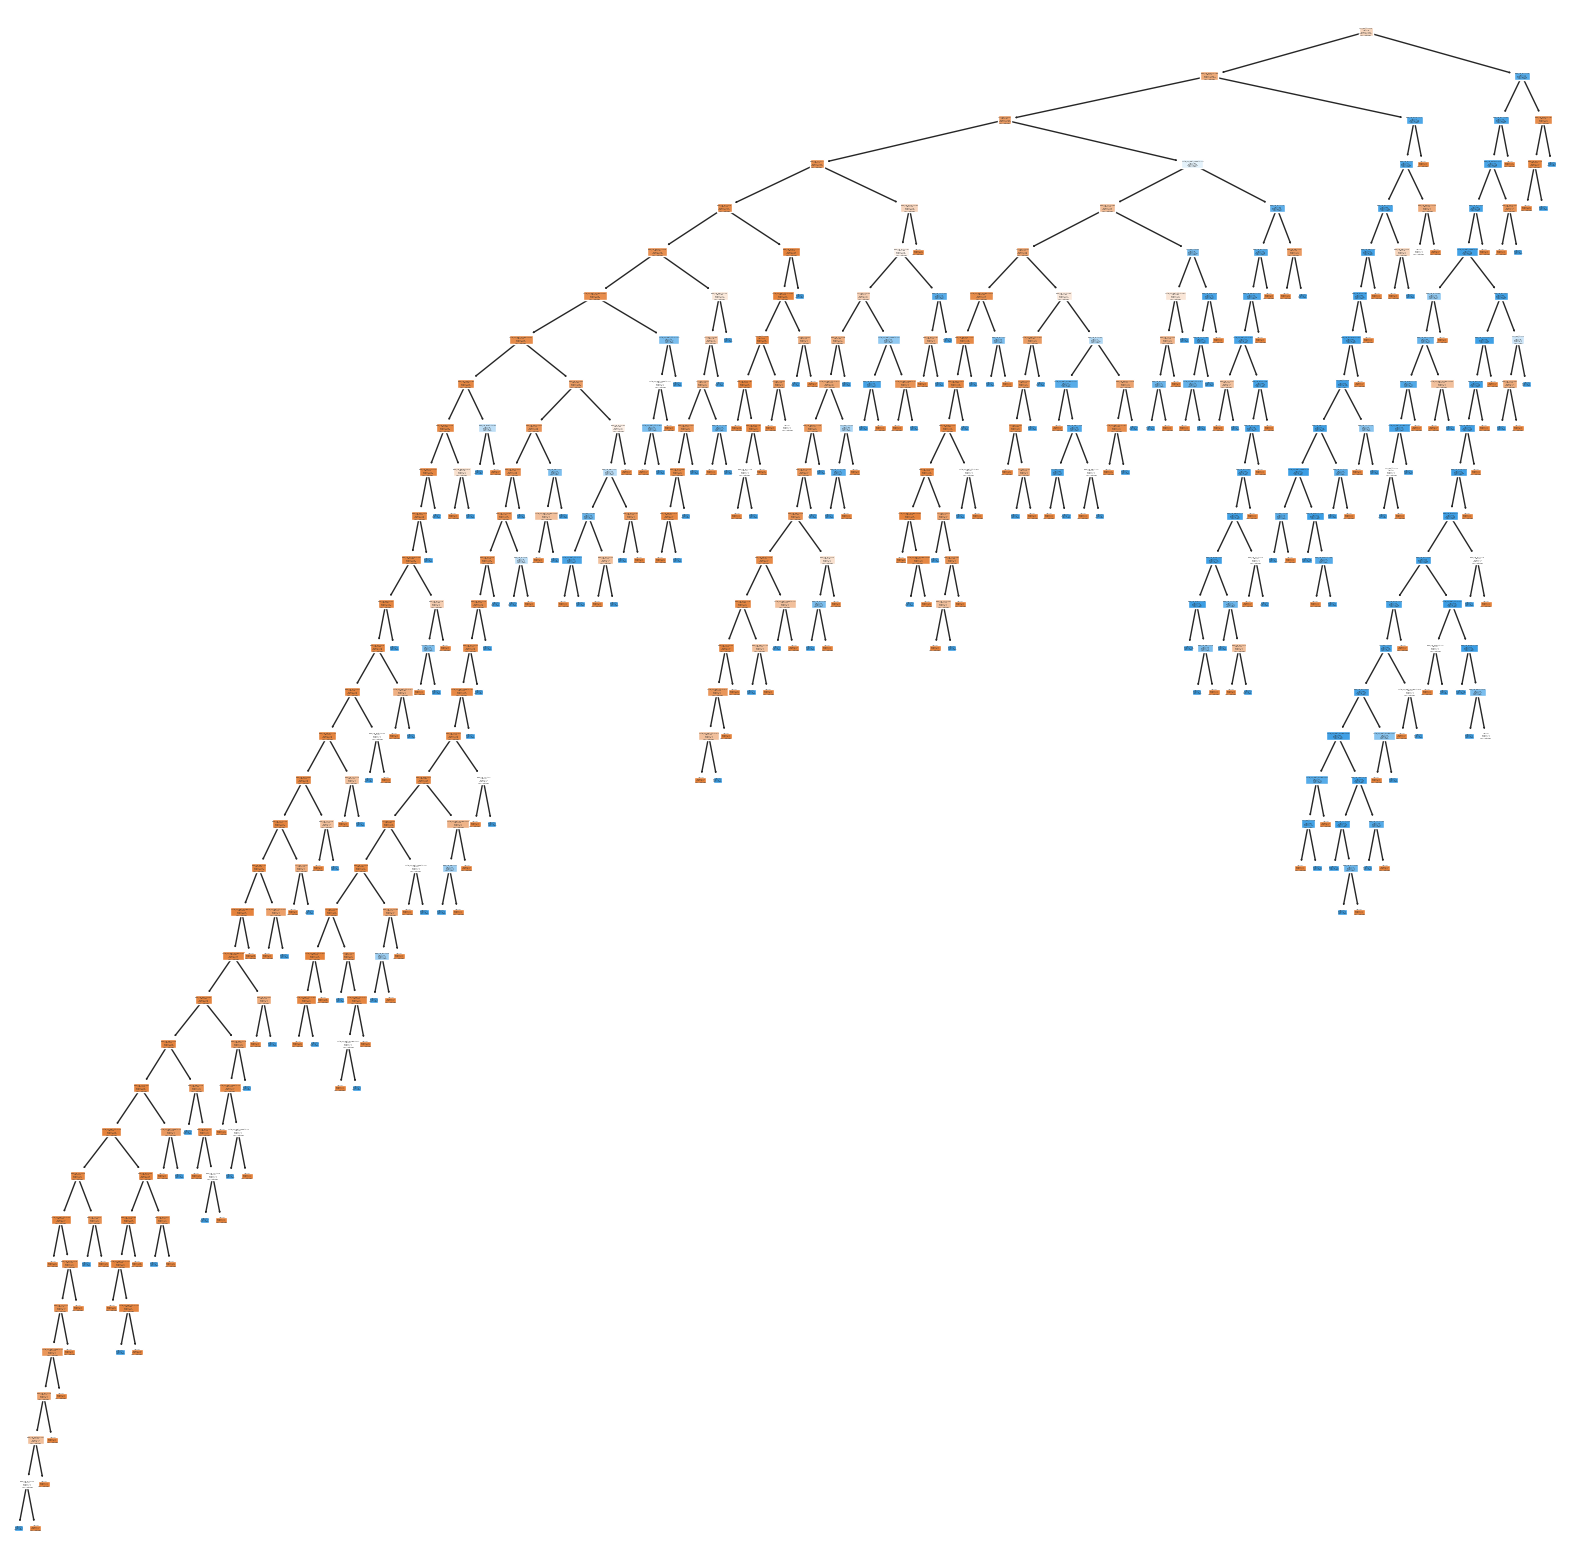

In [6]:
from sklearn import tree

plt.figure(figsize=(20,20))
features = data.columns
classes = ['Not spam','spam']
tree.plot_tree(dtclf,feature_names=features,class_names=classes,filled=True)
plt.show()

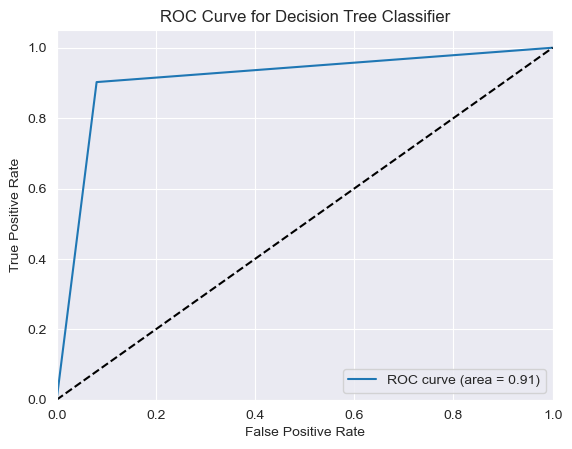

In [7]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# get false +ve and true + rate for different threshold vales
fpr,tpr,thresholds = roc_curve(y_test,y_test_pred)

#area under the curve
roc_auc = auc(fpr,tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# helper function- to get the confusion matrix
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
                ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9990497307570478
Test score 0.912630579297246
Train Confusion matrix


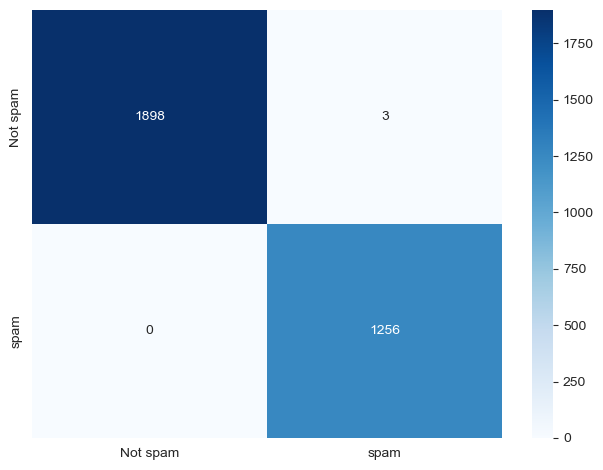

Test Confusion matrix


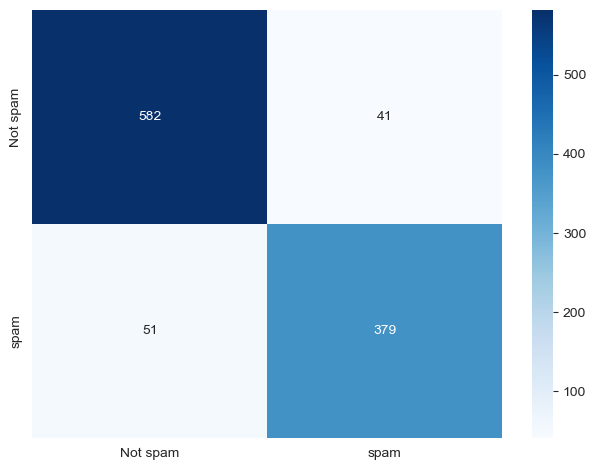

In [9]:
from sklearn.metrics import accuracy_score

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [10]:
print(confusion_matrix(y_test_pred,y_test))

[[582  41]
 [ 51 379]]


# Pre pruning

Here we stop the growing of the tree at an early stage by setting constraints
The grid search through parameters is done and the optimum values are chosen

Here following parameters are controled
- maximum depth of the tree
- minimum number of samples needed to split an interval node
- minimum number of samples needed to be a leaf node

In [11]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,4,6,8,10,12],
          'min_samples_split': [2,3,4],
          'min_samples_leaf': [1,2]}

dtclf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=dtclf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.9673740893253089
Test score 0.9287749287749287
Train Confusion matrix


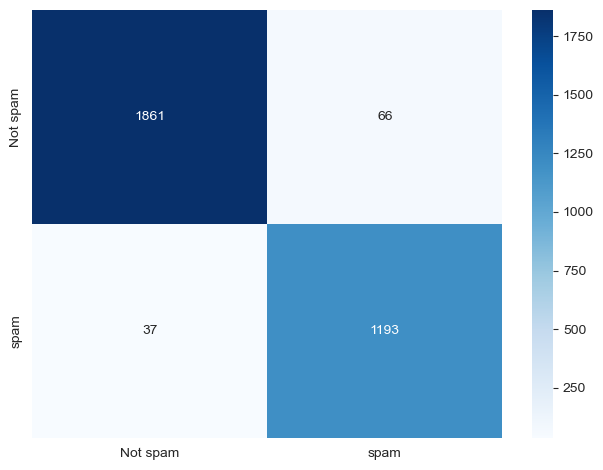

Test Confusion matrix


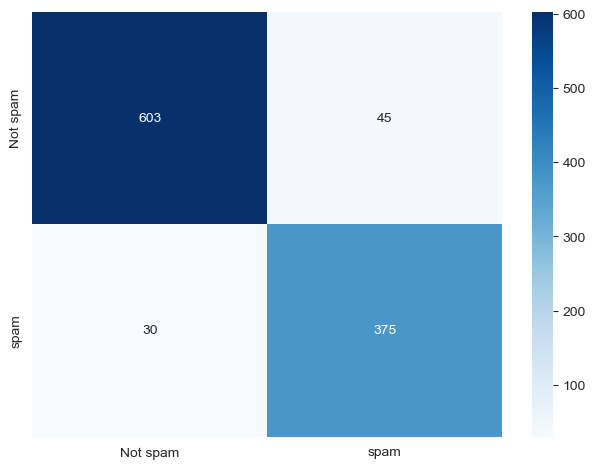

In [12]:
model_dtc = gcv.best_estimator_
model_dtc.fit(x_train,y_train)

y_train_pred = model_dtc.predict(x_train)
y_test_pred = model_dtc.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [13]:
print(confusion_matrix(y_test_pred,y_test))

[[603  45]
 [ 30 375]]


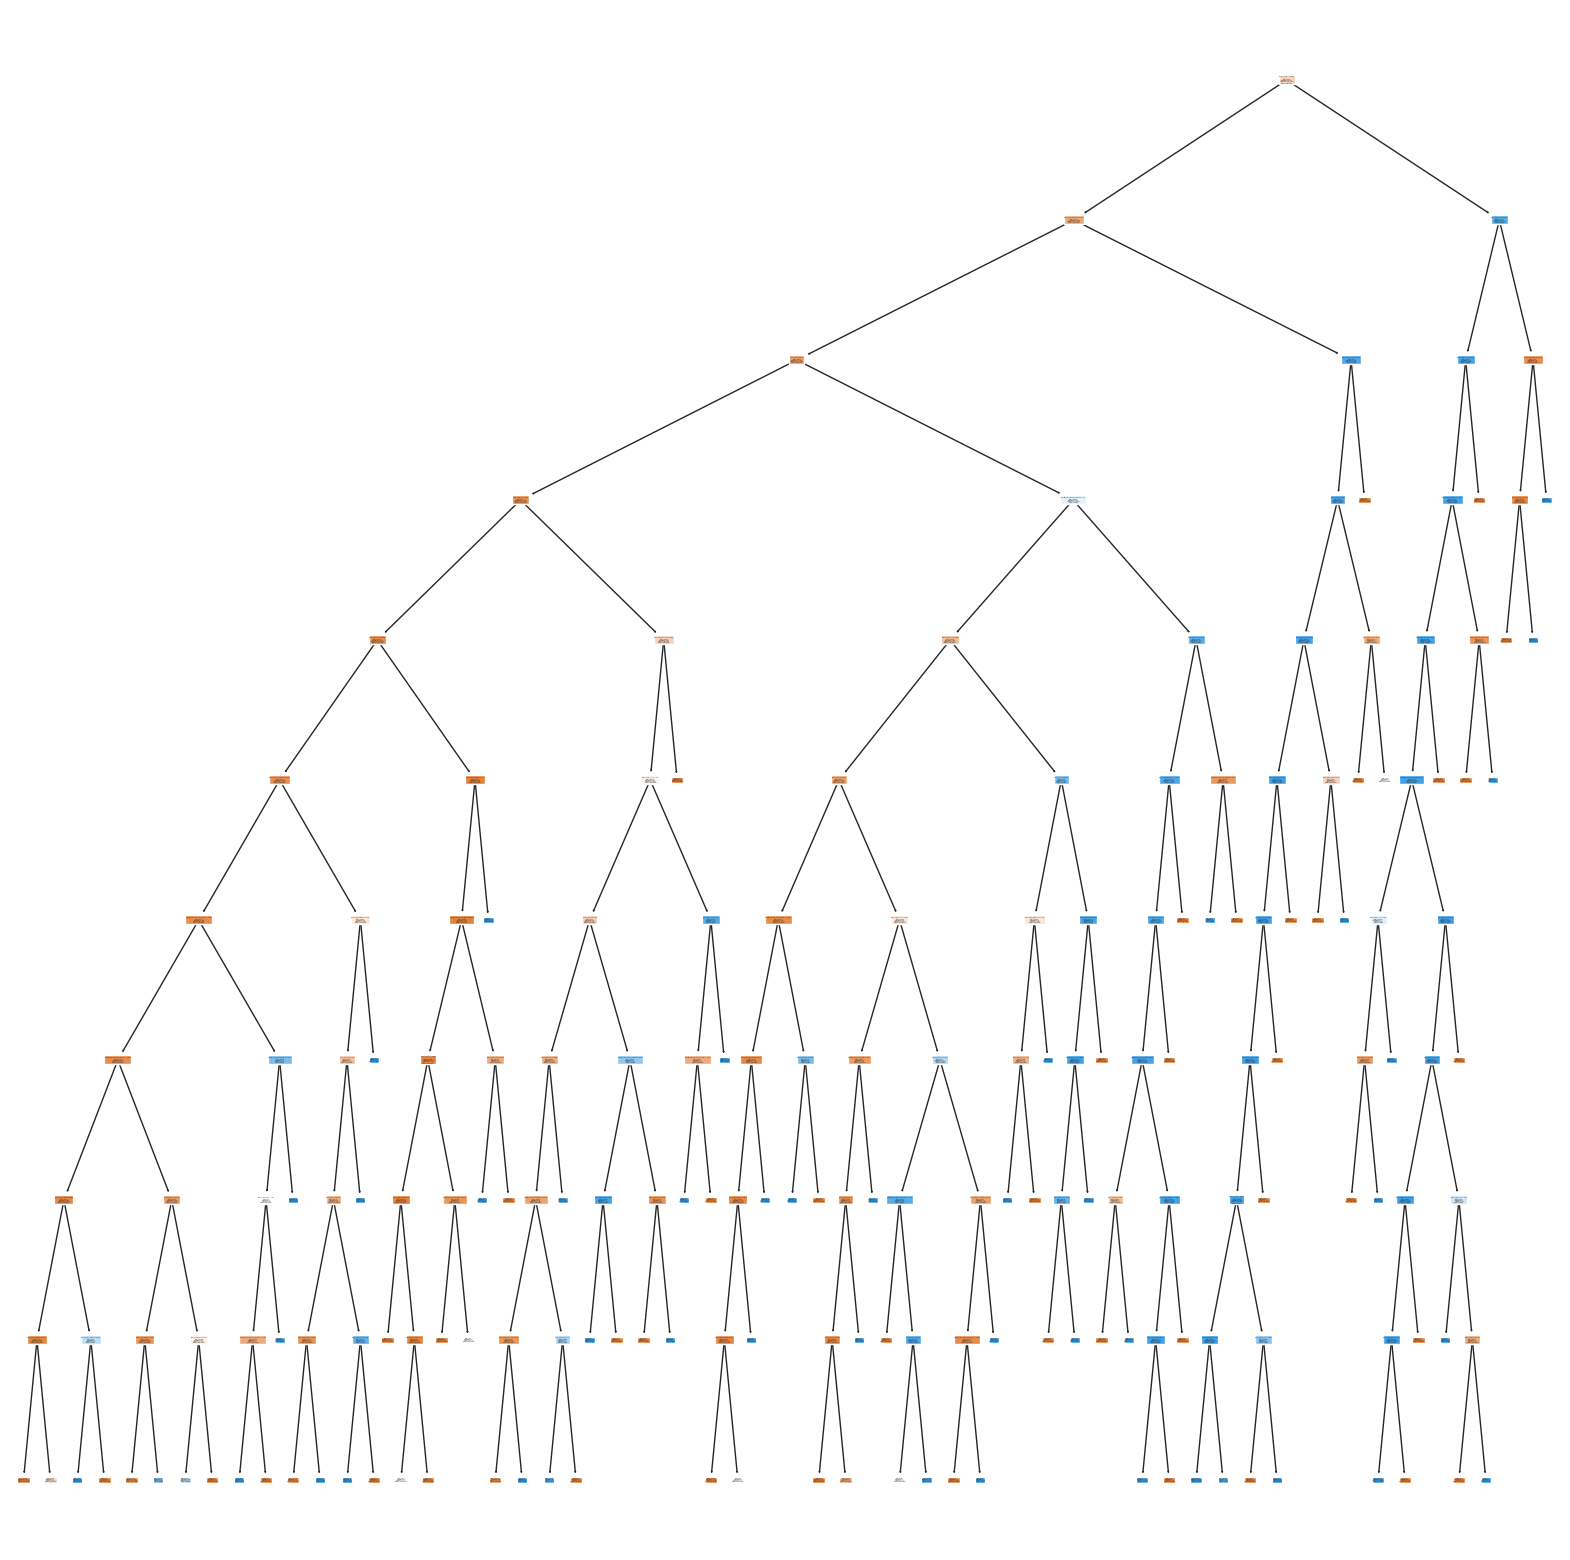

In [14]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['No spam','spam']
tree.plot_tree(model_dtc,feature_names=features,class_names=classes,filled=True)
plt.show()

After pruning there is an improvement in test accuracy.

# Post pruning
For further improvements let's do cost complexity pruning as a post pruning technique to avoid overfitting as decison trees are more likely to get overfitted.

## Cost Complexity pruning

In [17]:
path = dtclf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 8.89934688e-05 1.58378207e-04 1.58378207e-04
 1.89277723e-04 2.06143063e-04 2.10264630e-04 2.81561257e-04
 2.90831410e-04 2.94130956e-04 2.99158836e-04 3.00918594e-04
 3.04573475e-04 3.06857776e-04 3.07157735e-04 3.09849610e-04
 3.11957075e-04 3.13850392e-04 3.13994444e-04 3.14319827e-04
 3.14357600e-04 3.14864431e-04 3.16073750e-04 3.16756414e-04
 3.16756414e-04 3.16756414e-04 3.52417732e-04 3.71841643e-04
 3.79318380e-04 3.91201970e-04 4.17542546e-04 4.22341886e-04
 4.22341886e-04 4.22341886e-04 4.22341886e-04 4.75134621e-04
 4.75134621e-04 4.75134621e-04 4.75134621e-04 4.75134621e-04
 4.75134621e-04 4.75502923e-04 5.00800655e-04 5.06810263e-04
 5.15007030e-04 5.27927357e-04 5.27927357e-04 5.27927357e-04
 5.43010996e-04 5.44519360e-04 5.54323725e-04 5.54323725e-04
 5.54323725e-04 5.60922817e-04 5.60975859e-04 5.76520671e-04
 5.80720093e-04 5.84781073e-04 5.85945523e-04 5.88261912e-04
 5.98317671e-04 6.00286631e-04 6.10260136e-04 6.10887370e-04
 6.19740811e-04 6.962851

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


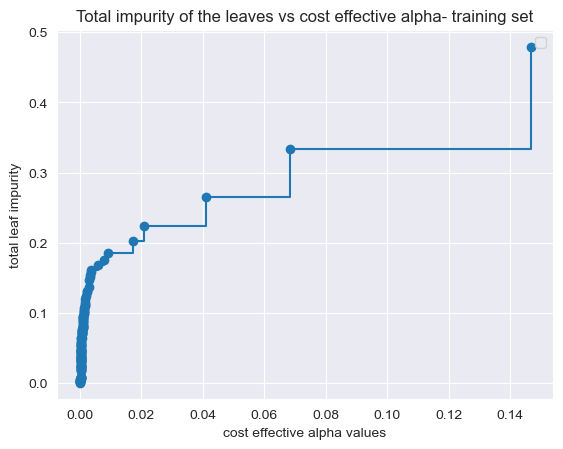

In [18]:
plt.scatter(ccp_alphas,impurities)
plt.plot()
plt.plot(ccp_alphas,impurities,drawstyle="steps-post")
plt.xlabel("cost effective alpha values")
plt.ylabel("total leaf impurity")
plt.legend()
plt.title("Total impurity of the leaves vs cost effective alpha- training set")
plt.show()

In [19]:
# For each alpha the model is appended to a list
model_list = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    model_list.append(clf)

The last element in models and alpha values are removed as it is a trivial tree with a single node

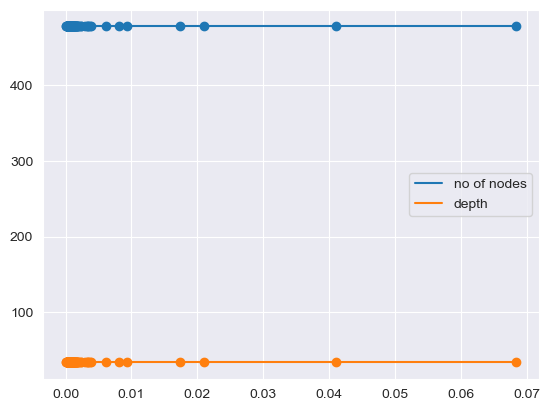

In [20]:
model_list = model_list[:-1]
ccp_alphas = ccp_alphas[:-1]

dtclf = DecisionTreeClassifier()
dtclf.fit(x_train,y_train)

tree = dtclf.tree_

node_counts = [dtclf.tree_.node_count for model in model_list]
depth = [dtclf.tree_.max_depth for model in model_list]

plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes')
plt.plot(ccp_alphas,depth,label='depth')
plt.legend()
plt.show()

Here the observations are not clear enough

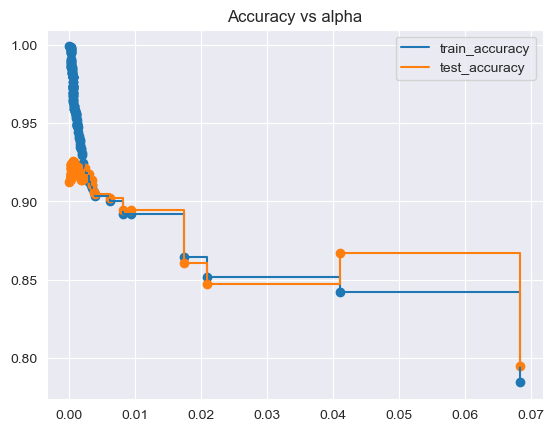

In [21]:
train_acc = []
test_acc = []
for c in model_list:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha as = 0.01

Train score 0.8916693063034526
Test score 0.8945868945868946
Train Confusion matrix


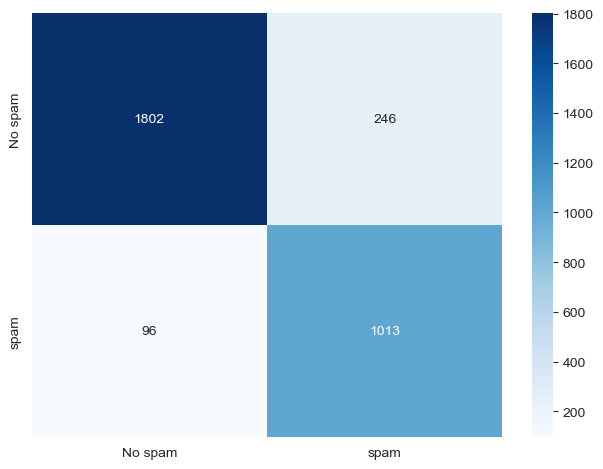

Test Confusion matrix


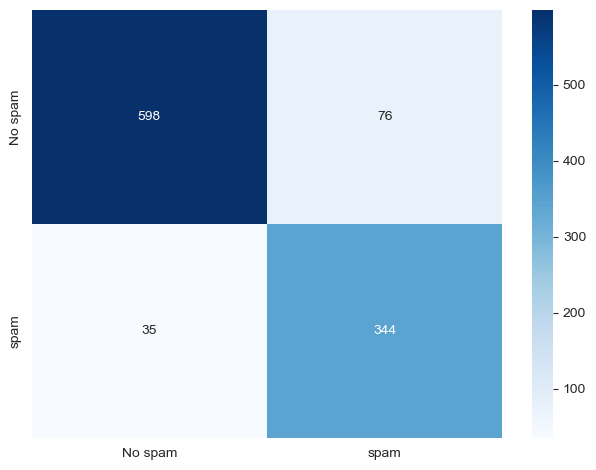

In [22]:

clf_ = DecisionTreeClassifier(random_state=42,ccp_alpha=0.01)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

overfitting is not happening and the performance on the test data have improved

In [23]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [24]:
features = data.columns[:-1]
classes = ['No spam','Spam']

from sklearn.tree import export_graphviz
import graphviz
dtclf = DecisionTreeClassifier()
dtclf.fit(x_train, y_train)

dot_data = export_graphviz(dtclf, out_file=None, feature_names=features, class_names=classes)
graph = graphviz.Source(dot_data)
graph.format = 'jpg' # set the output format to JPG
graph.render("Spam- non spam decision tree") # creates a PDF file with the visualization

'Spam- non spam decision tree.jpg'

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

predictions=dtclf.predict(x_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       633
           1       0.87      0.90      0.88       420

    accuracy                           0.91      1053
   macro avg       0.90      0.90      0.90      1053
weighted avg       0.91      0.91      0.91      1053

[[579  54]
 [ 44 376]]


Here the size of the tree has reduced

In [26]:
from sklearn.metrics import precision_score
from sklearn import metrics

accuracy_dtc =metrics.accuracy_score(y_test,predictions)
prec_dtc = precision_score(y_test, predictions)
Sensitivity_recall_dtc = metrics.recall_score(y_test, predictions) # Sensitivity- how well the model predicts something is positive
Specificity_dtc = metrics.recall_score(y_test, predictions) # Specificity- how well the model predicts something is negative
F_score_dtc = metrics.f1_score(y_test,predictions)

print("accuracy of Decision Tree  model: ",accuracy_dtc)
print("Precision of Decision Tree  model: ",prec_dtc)
print("Sensitivity of Decision Tree  model: ",Sensitivity_recall_dtc)
print("Specificity of Decision Tree model: ",Specificity_dtc)
print("F1 score of Decision Tree  model: ",F_score_dtc)

accuracy of Decision Tree  model:  0.9069325735992403
Precision of Decision Tree  model:  0.8744186046511628
Sensitivity of Decision Tree  model:  0.8952380952380953
Specificity of Decision Tree model:  0.8952380952380953
F1 score of Decision Tree  model:  0.8847058823529412
